In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

**Opening `.csv` database file**

In [2]:
base = pd.read_csv('./data/train.csv').drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
base.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


**Check if contains `null` values**

In [3]:
print(base.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


**Processing `null` values`**

In [4]:
if base.isnull().sum().sum() > 0:
	base = base.dropna()

print(base.isnull().sum())
print(base.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
(714, 7)


**Counting the number of classes in the database**

(array([0, 1]), array([424, 290]))


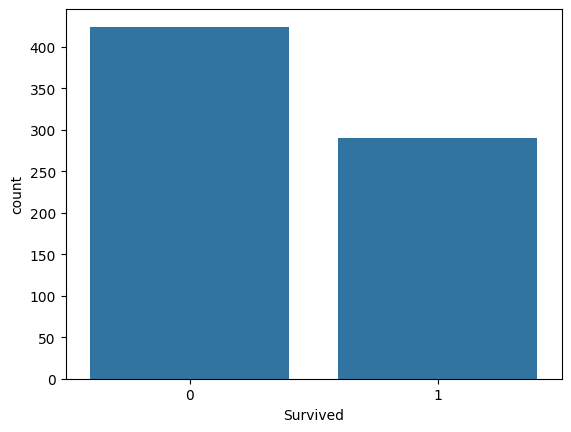

In [5]:
classification = base.columns[0]
print(np.unique(base[classification], return_counts=True))

plt.show(sns.countplot(x = base[classification]))

**Categorical data encoding**
- `LabelEncoder` - For treat the categorical data by placing 1, 2, 3 etc.
- `OneHotEncoder` - For treat the categorical data by creating a column for each category (non-ordinal).


In [6]:
columns_label_encode = ['Sex']
base[columns_label_encode] = base[columns_label_encode].apply(LabelEncoder().fit_transform)

print(f'shape: {base.shape}')
base.head()

shape: (714, 7)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


**Splitting the dataset into x (features) and y (target)**

In [7]:
x = base.drop(columns=[classification])

print(f'x shape: {x.shape}')
x.head()

x shape: (714, 6)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [8]:
y = base.drop(columns=x.columns)

print(f'y shape: {y.shape}')
y.head()

y shape: (714, 1)


,Survived
0,0
1,1
2,1
3,1
4,0


**Splitting the dataset into training and test sets**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (571, 6)
y_train shape: (571, 1)
x_test shape: (143, 6)
y_test shape: (143, 1)


**Balancing the dataset**
- `SMOTE` - Synthetic Minority Over
- `TomekLinks` - Tomek Links
- `RandomUnderSampler` - Random under-sampling

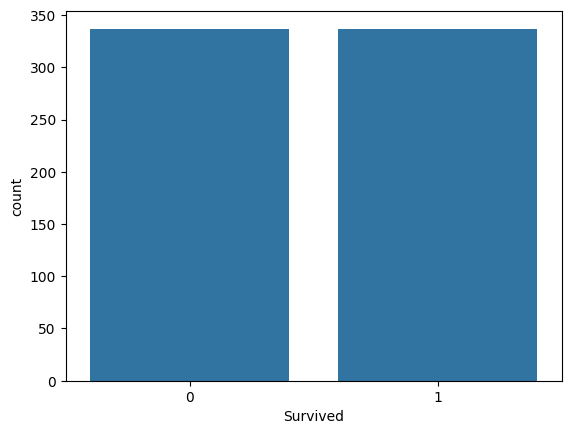

(array([0, 1]), array([337, 337]))
x_train_smote shape: (674, 6)
y_train_smote shape: (674, 1)



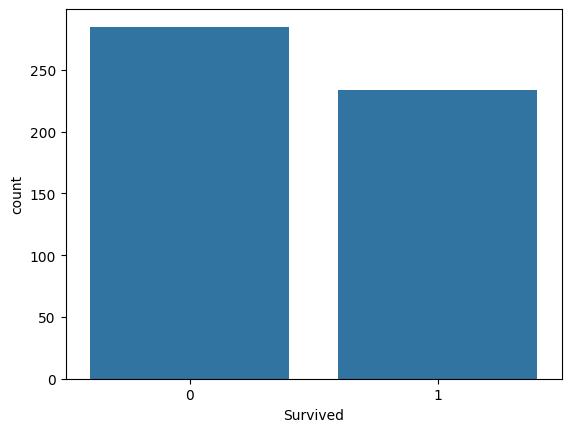

(array([0, 1]), array([285, 234]))
x_train_tomek shape: (519, 6)
y_train_tomek shape: (519, 1)



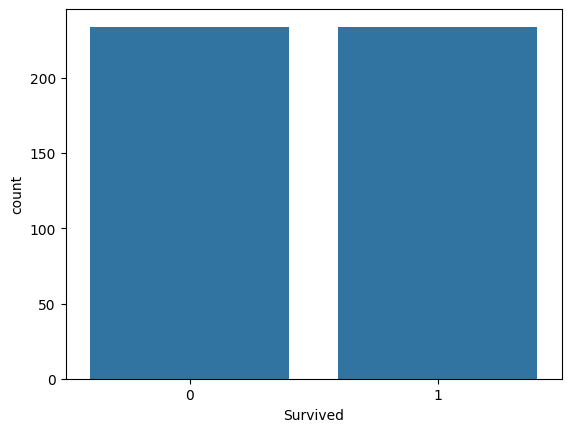

(array([0, 1]), array([234, 234]))
x_train_rus shape: (468, 6)
y_train_rus shape: (468, 1)


In [10]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

plt.show(sns.countplot(x = y_train_smote[classification]))
print(np.unique(y_train_smote[classification], return_counts=True))
print(f'x_train_smote shape: {x_train_smote.shape}')
print(f'y_train_smote shape: {y_train_smote.shape}\n')


tomek = TomekLinks()
x_train_tomek, y_train_tomek = tomek.fit_resample(x_train, y_train)

plt.show(sns.countplot(x = y_train_tomek[classification]))
print(np.unique(y_train_tomek[classification], return_counts=True))
print(f'x_train_tomek shape: {x_train_tomek.shape}')
print(f'y_train_tomek shape: {y_train_tomek.shape}\n')

rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

plt.show(sns.countplot(x = y_train_rus[classification]))
print(np.unique(y_train_rus[classification], return_counts=True))
print(f'x_train_rus shape: {x_train_rus.shape}')
print(f'y_train_rus shape: {y_train_rus.shape}')

**Testing models with `DecisionTreeClassifier`**

In [ ]:
search_space = {
	'criterion':  ['gini', 'entropy'],
	'max_depth':  [None, 2, 4, 6, 8],
	'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

model = BayesSearchCV(
	estimator=DecisionTreeClassifier(),
	search_spaces=search_space,
	cv=10,
	n_jobs=5,
	verbose=0,
	n_iter=30,
)

smote_model = model.fit(x_train_smote, y_train_smote)
print(f'smote_model.best_params_: {smote_model.best_params_}')
print(f'smote_model.best_score_: {smote_model.best_score_}')

tomek_model = model.fit(x_train_tomek, y_train_tomek)
print(f'tomek_model.best_params_: {tomek_model.best_params_}')
print(f'tomek_model.best_score_: {tomek_model.best_score_}')

rus_model = model.fit(x_train_rus, y_train_rus)
print(f'rus_model.best_params_: {rus_model.best_params_}')
print(f'rus_model.best_score_: {rus_model.best_score_}')

/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(8), np.str_('sqrt')] before, using random point ['entropy', None, 'sqrt']
  warnings.warn(
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(8), np.str_('sqrt')] before, using random point ['gini', 8, 0.8]
  warnings.warn(
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(8), np.str_('sqrt')] before, using random point ['gini', 6, 'log2']
  warnings.warn(
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.

OrderedDict([('criterion', 'gini'), ('max_depth', 8), ('max_features', 'sqrt')])
0.8354916593503073


/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('gini'), np.int64(6), np.str_('sqrt')] before, using random point ['entropy', 4, 'log2']
  warnings.warn(


OrderedDict([('criterion', 'gini'), ('max_depth', 6), ('max_features', 'sqrt')])
0.832315233785822


/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('entropy'), np.int64(8), np.float64(0.4)] before, using random point ['entropy', 8, 0.2]
  warnings.warn(
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('entropy'), np.int64(8), np.float64(0.4)] before, using random point ['entropy', 8, 0.4]
  warnings.warn(


OrderedDict([('criterion', 'entropy'), ('max_depth', 4), ('max_features', 0.8)])
0.7990286771507862


**Running models with the best hyperparameters**

In [12]:
smote_model = smote_model.best_estimator_
smote_model.fit(x_train_smote, y_train_smote)
print(f'Train score: {smote_model.score(x_train_smote, y_train_smote)}')

tomek_model = tomek_model.best_estimator_
tomek_model.fit(x_train_tomek, y_train_tomek)
print(f'Train score: {tomek_model.score(x_train_tomek, y_train_tomek)}')

rus_model = rus_model.best_estimator_
rus_model.fit(x_train_rus, y_train_rus)
print(f'Train score: {rus_model.score(x_train_rus, y_train_rus)}')

Train score: 0.8456973293768546
Train score: 0.8477842003853564
Train score: 0.8354700854700855


**Testing models on the test set**

Smote Precision: 60.00%
Smote Recall: 80.36%
Smote F1: 68.70%
Tomek Precision: 60.00%
Tomek Recall: 80.36%
Tomek F1: 68.70%
Rus Precision: 60.00%
Rus Recall: 80.36%
Rus F1: 68.70%


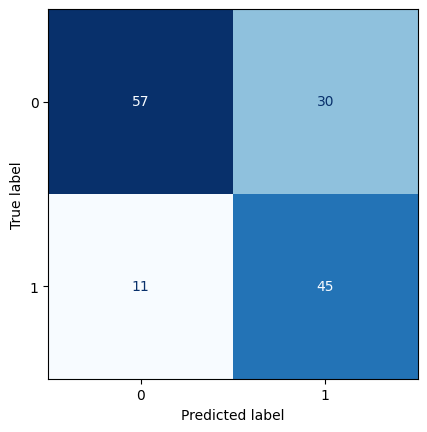

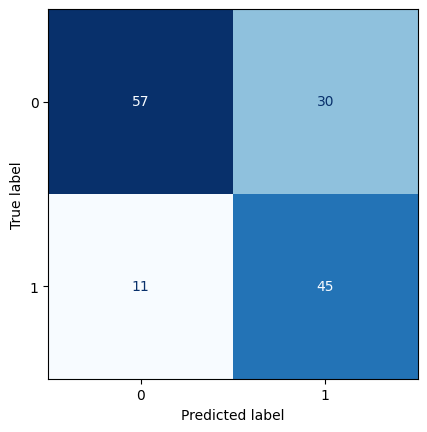

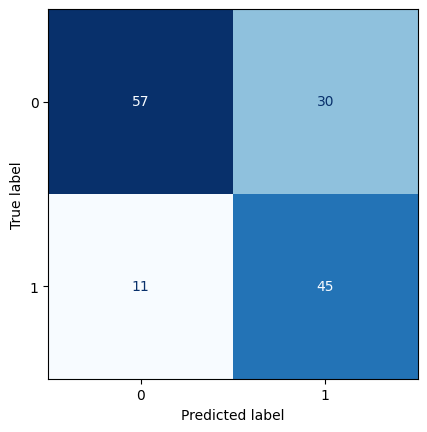

In [13]:
smote_predictions = smote_model.predict(x_test)
smote_cm = confusion_matrix(y_test, smote_predictions)

print(f'Smote Precision: {precision_score(y_test, smote_predictions) * 100:.2f}%')
print(f'Smote Recall: {recall_score(y_test, smote_predictions) * 100:.2f}%')
print(f'Smote F1: {f1_score(y_test, smote_predictions) * 100:.2f}%')

disp = ConfusionMatrixDisplay(confusion_matrix=smote_cm, display_labels=smote_model.classes_)
disp.plot(colorbar=False, cmap='Blues')
plt.grid(False)

tomek_predictions = tomek_model.predict(x_test)
tomek_cm = confusion_matrix(y_test, tomek_predictions)

print(f'Tomek Precision: {precision_score(y_test, tomek_predictions) * 100:.2f}%')
print(f'Tomek Recall: {recall_score(y_test, tomek_predictions) * 100:.2f}%')
print(f'Tomek F1: {f1_score(y_test, tomek_predictions) * 100:.2f}%')

disp = ConfusionMatrixDisplay(confusion_matrix=tomek_cm, display_labels=tomek_model.classes_)
disp.plot(colorbar=False, cmap='Blues')
plt.grid(False)

rus_predictions = rus_model.predict(x_test)
rus_cm = confusion_matrix(y_test, rus_predictions)

print(f'Rus Precision: {precision_score(y_test, rus_predictions) * 100:.2f}%')
print(f'Rus Recall: {recall_score(y_test, rus_predictions) * 100:.2f}%')
print(f'Rus F1: {f1_score(y_test, rus_predictions) * 100:.2f}%')

disp = ConfusionMatrixDisplay(confusion_matrix=rus_cm, display_labels=rus_model.classes_)
disp.plot(colorbar=False, cmap='Blues')
plt.grid(False)